<center>
<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    
##  II Escuela de Verano en Física Computacional

Autores: [Neisser Pino R.](https://scholar.google.com.pe/citations?user=pAB28NEAAAAJ&hl=es), [Ricardo Quispe M.](https://github.com/RcrdPhysics).\
Institución: Universidad Nacional Mayor de San Marcos\
Correo: ricardo.quispe5@unmsm.edu.pe
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/PCPUNMSM) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/channel/UCze8vzQLcplutz0nWDNjFCA).*
    

# <center> Sesión 3. Diferenciación numérica e Interpolación
<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Derivative.svg/1200px-Derivative.svg.png"  width=50% />
</p>

## Outline
1. Diferenciación numérica
2. Interpolación de Lagrange
3. Interpolación de Newton

## 1. Diferenciación numérica

Una **cuadrícula numérica** es un conjunto de puntos espaciados uniformemente sobre el dominio de una función (es decir, la variable independiente), durante algún intervalo. El **espaciado** o **tamaño de paso** de una cuadrícula numérica es la distancia entre puntos adyacentes en la cuadrícula. Para el propósito de este texto, si $x$ es una cuadrícula numérica, entonces $x_j$ es el punto $j^{\mathrm{th}}$ en la cuadrícula numérica y $h$ es el espacio entre $x_{j -1}$ y $x_j$. La siguiente figura muestra un ejemplo de cuadrícula numérica.

<p align="center">
<img src="https://pythonnumericalmethods.berkeley.edu/_images/20.01.01-Numerical_grid.png" alt="Numerical grid" title="Numerical grid used to approximate functions." width="400"/>
</p> 

Hay varias funciones en Python que se pueden usar para generar cuadrículas numéricas. Para cuadrículas numéricas en una dimensión, es suficiente usar la función *linspace*, que ya ha usado para crear matrices espaciadas regularmente.

En Python, una función $f(x)$ se puede representar en un intervalo calculando su valor en una cuadrícula. Aunque la función en sí puede ser continua, esta representación **discreta** o **discretizada** es útil para cálculos numéricos y corresponde a conjuntos de datos que pueden adquirirse en la práctica de la ingeniería y la ciencia. Específicamente, el valor de la función solo puede conocerse en puntos discretos. Por ejemplo, un sensor de temperatura puede entregar pares de temperatura versus tiempo a intervalos de tiempo regulares. Aunque la temperatura es una función del tiempo suave y continua, el sensor solo proporciona valores a intervalos de tiempo discretos y, en este caso particular, ni siquiera se conocería la función subyacente.

Ya sea que $f$ sea una función analítica o una representación discreta de una, nos gustaría derivar métodos para aproximar la derivada de $f$ sobre una cuadrícula numérica y determinar su precisión.

### Derivadas aproximadas de diferencia finita

La derivada $ f '(x) $ de una función $ f (x) $ en el punto $ x = a $ se define como:

$$ f '(a) = \lim \limits_{x\to a} \frac{f(x) - f (a)}{x-a} $$

La derivada en $ x = a $ es la pendiente en este punto. En aproximaciones de **diferencia finita** de esta pendiente, podemos usar valores de la función en la vecindad del punto $ x = a $ para lograr la meta. Hay varias fórmulas de diferencias finitas utilizadas en diferentes aplicaciones, y tres de ellas, donde la derivada se calcula utilizando los valores de dos puntos, se presentan a continuación.

La **diferencia hacia adelante** es estimar la pendiente de la función en $ x_j $ usando la línea que conecta $ (x_j, f (x_j)) $ y $ (x_ {j + 1}, f (x_ {j + 1})) $:

$$ f '(x_j) = \frac{f (x_{j + 1}) - f (x_j)}{x_{j+1} -x_j} $$

La **diferencia hacia atrás** es estimar la pendiente de la función en $ x_j $ usando la línea que conecta $ (x_ {j-1}, f (x_ {j-1})) $ y $ (x_j, f (x_j)) $:

$$ f '(x_j) = \frac{f (x_j) - f (x_{j-1})} {x_j - x_{j-1}} $$

La **diferencia central** es estimar la pendiente de la función en $ x_j $ usando la línea que conecta $ (x_ {j-1}, f (x_ {j-1})) $ y $ (x_ {j +1}, f (x_ {j + 1})) $:

$$ f '(x_j) = \frac{f (x_{j + 1}) - f (x_{j-1})} {x_{j + 1} - x_{j-1}} $$

La siguiente figura ilustra los tres tipos diferentes de fórmulas para estimar la pendiente.

<p align="center">
<img src="https://pythonnumericalmethods.berkeley.edu/_images/20.02.01-Finite-difference.png" alt="Finite difference" title="Finite difference approximation of the derivative." width="800"/>
</p>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
 def derivative(f,a,method='centrada',h=1e-1):
    if method == 'centrada':
        return (f(a + h) - f(a - h))/(2*h)  # METODO PTO CENTRAL
    elif method == 'adelante':
        return (f(a + h) - f(a))/h  # METODO PTO HACIA ADELANTE
    elif method == 'atras':
        return (f(a) - f(a - h))/h  # METODO PTO HACIA ATRAS
    else:
        raise ValueError("Los métodos pueden ser 'centrada', 'adelante' o 'atrás'.")

### Evaluando en un punto

$$f(x) =e^{\sin(x)}$$

In [ ]:
def e(x): #f(x)
  return np.exp(np.sin(x))   # exp (exponencial)

$$\frac{d}{dx} e^{\sin(x)} = cos(x)e^{sin(x)} $$

In [ ]:
def de(x): #f'(x)
  return np.cos(x)*np.exp(np.sin(x))

$$x=0 \qquad \rightarrow \quad cos(0)e^{sin(0)} = 1 e^{0} = 1$$

In [ ]:
derivative(e,0)  # PTO CENTRAL  (h=0.1)

0.9999933444461767

In [ ]:
derivative(e,0,method='atras')

0.9501183855754614

$$x= \pi \qquad \rightarrow \quad cos(\pi)e^{sin(\pi)}= -1 e^0= -1$$

In [ ]:
derivative(e,np.pi)

-0.9999933444461778

### Evaluando en un dominio

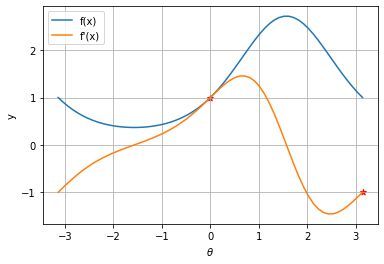

In [ ]:
a=-np.pi  # a = -pi
b=np.pi   # b = +pi
h=0.1 #tamaño del paso 

N=round((b-a)/h) #redondear el resultado, el cual será la cantidad de datos

x = np.linspace(a,b,N)  #vector dominio

plt.plot(x,e(x),x,de(x))#ploteando las funciones analíticas f y f'

# plt.plot(x,e(x))
# plt.plot(x,de(x))

plt.scatter([0,np.pi],[derivative(e,0),derivative(e,np.pi)], color='r', marker='*')

plt.legend(["f(x)","f'(x)"])
plt.xlabel("$θ$")
plt.ylabel('y')
plt.grid()

### Derivada analítica de f(x) y sus aproximaciones:

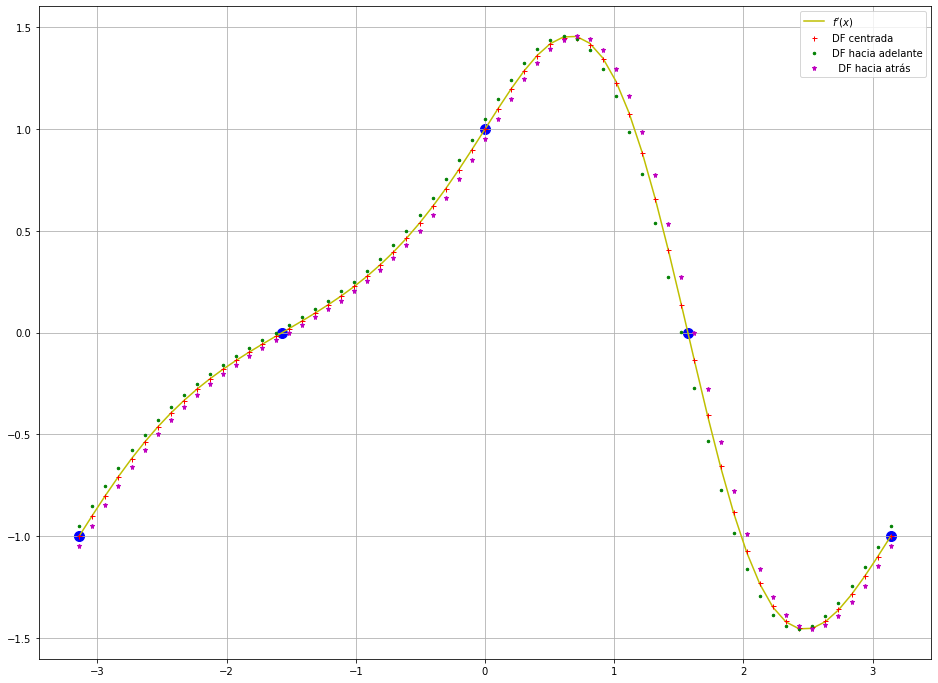

In [ ]:
de_c=derivative(e,x,method='centrada')
de_ad=derivative(e,x,method='adelante')
de_at=derivative(e,x,method='atras')

puntos=np.array([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
y_puntos=derivative(e,puntos)

plt.figure(figsize = (16, 12)) #tamaño del plot

plt.plot(x,de(x), 'y') #derivada  analítica
#Utilizamos h=0.1 solo con fines de visualización (defecto)
plt.plot(x,de_c,'r+', ms=5) #centrada por defecto 
plt.plot(x,de_ad,'g.', ms=5) #adelante
plt.plot(x,de_at,'m* ', ms=5) #atrás

plt.grid()

plt.scatter(puntos,y_puntos, s= 100.,c='b') # s: tamaño del punto, c: color 'b'=blue

plt.legend(["$f'(x)$",'DF centrada','DF hacia adelante','  DF hacia atrás'])

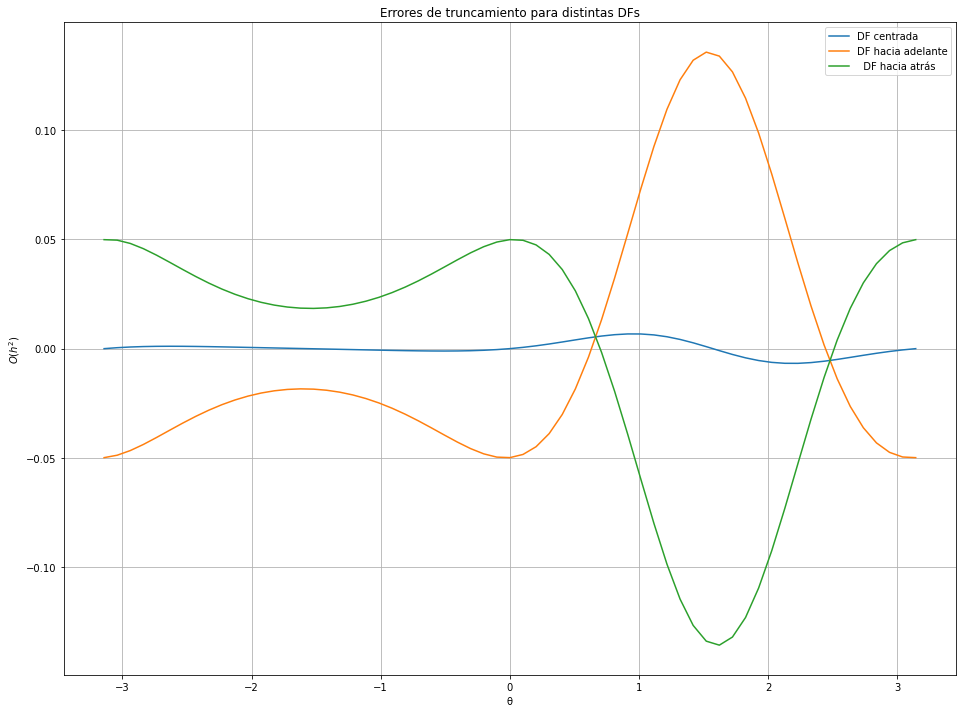

In [ ]:
plt.figure(figsize = (16, 12)) #tamaño del plot

#Errores absolutos (X_exacto - X_aprox)
c_err=de(x)-de_c
ad_err=de(x)-de_ad
at_err=de(x)-de_at

#plt.plot(x,de(x), 'y') #solución analítica
#Utilizamos h=0.1 solo con fines de visualización
plt.plot(x,c_err)#,'r+', ms=5) #centrada por defecto 
plt.plot(x,ad_err)#,'g.', ms=5) #adelante
plt.plot(x,at_err)#,'m* ', ms=5) #atrás
plt.legend(['DF centrada','DF hacia adelante','  DF hacia atrás'])
plt.title('Errores de truncamiento para distintas DFs')
plt.ylabel('$O(h^2)$')
plt.xlabel('θ')
plt.grid()
plt.show()

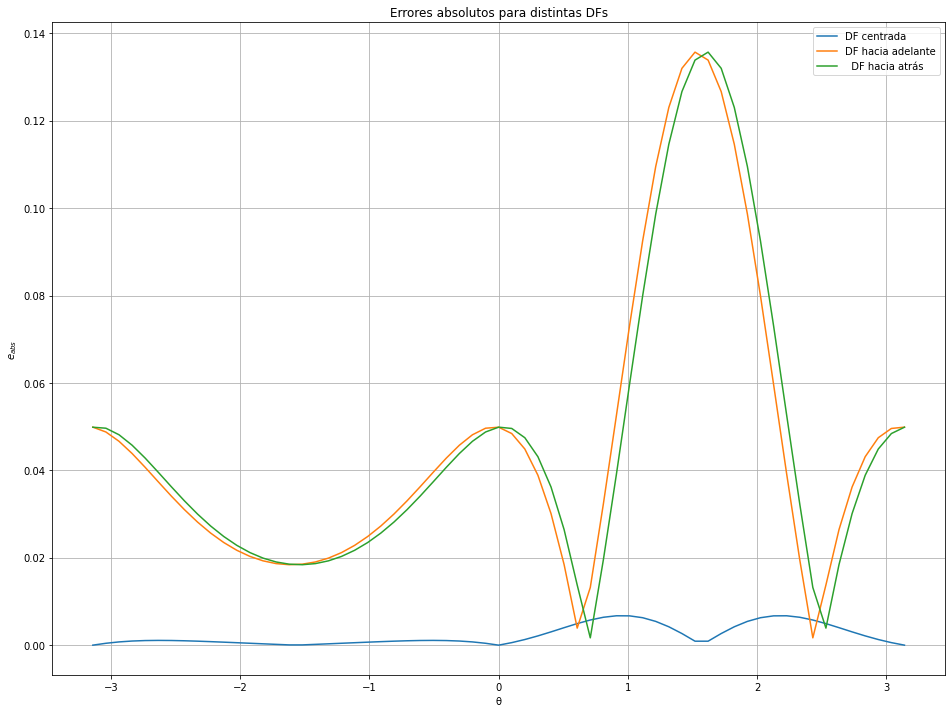

In [ ]:
plt.figure(figsize = (16, 12)) #tamaño del plot

#Errores absolutos
c_err=np.abs(de(x)-de_c) 
ad_err=np.abs(de(x)-de_ad)
at_err=np.abs(de(x)-de_at)

#plt.plot(x,de(x), 'y') #solución analítica
#Utilizamos h=0.1 solo con fines de visualización
plt.plot(x,c_err)#,'r+', ms=5) #centrada por defecto 
plt.plot(x,ad_err)#,'g.', ms=5) #adelante
plt.plot(x,at_err)#,'m* ', ms=5) #atrás
plt.legend(['DF centrada','DF hacia adelante','  DF hacia atrás'])
plt.title('Errores absolutos para distintas DFs')
plt.ylabel('$e_{abs}$')
plt.xlabel('θ')
plt.grid()
plt.show()

In [ ]:
#Errores máximos

print(np.max(c_err),np.max(ad_err),np.max(at_err))

0.006725916382945174 0.13568159852691955 0.1356815985269192


In [ ]:
import time

# TIEMPO DE EJECUCION : TIEMPO QE DEMORA EL PROGRAMA EN PROCESAR TODAS OPERACIONES  (IMPORTANTE)
# TIEMPO DE SIMULACION : TIEMPO REAL DEL PROBLEMA >> DISCRETIZADO N = (b-a)/h

start_time = time.time() # INICIO DEL TIEMPO

step_l=[] #lista de número de pasos
h_l=[] #lista de tamaños de pasos
errc_l=[] 
errad_l=[]
errat_l=[]

# BUCLE 10 >> 100 >> 10 000
for i in range(10,10000,100):
  a=-np.pi
  b=np.pi 
  h=1/i #tamaño del paso 

  N=round((b-a)/h) #redondear el resultado, el cual será la cantidad de datos

  # VECTOR datos X
  x=np.linspace(a,b,N)
  #y=derivative(e,x,h=h)

  de_c=derivative(e,x, h=h)
  de_ad=derivative(e,x, h=h,method='adelante')
  de_at=derivative(e,x, h=h,method='atras')

  #tomamos los máximos errores máximos por iteración sobre el dominio [a,b] 
  c_err=np.max(np.abs(de(x)-de_c))
  ad_err=np.max(np.abs(de(x)-de_ad))
  at_err=np.max(np.abs(de(x)-de_at))

  # AÑADIR EL RESULTADO AL VECTOR INDICADO
  errc_l.append(c_err)
  errad_l.append(ad_err)
  errat_l.append(at_err)

  step_l.append(N)
  h_l.append(h)
  

# TIEMPO FINAL - TIEMPO INICIAL
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.8150968551635742 seconds ---


In [ ]:
len(errad_l) # LONGITUD DEL VECTOR : CANTIDAD DE ELEMENTOS

100

Text(0, 0.5, 'h')

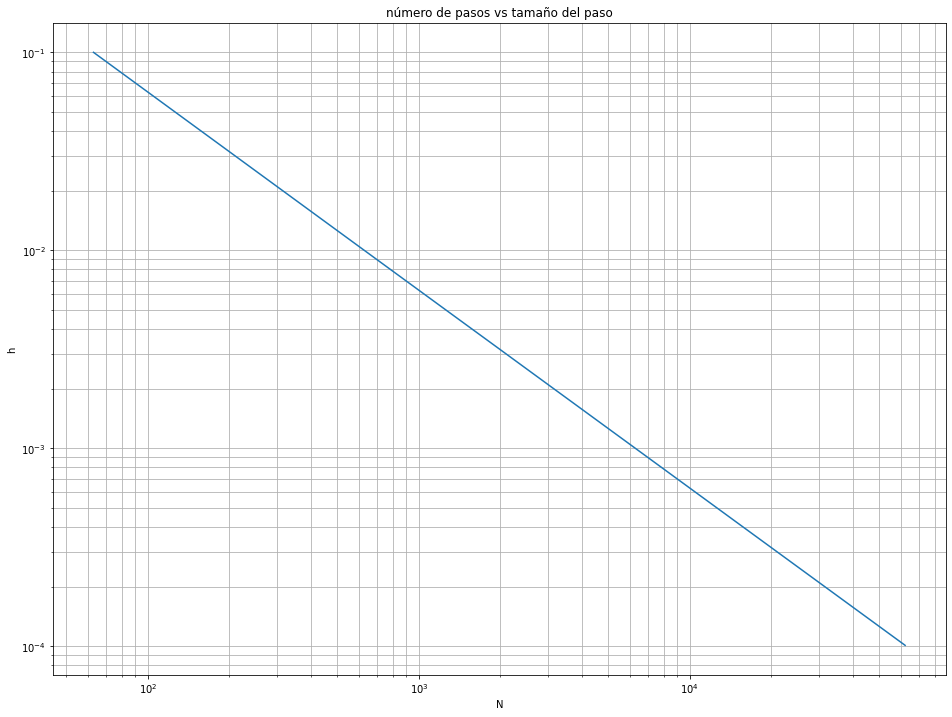

In [ ]:
plt.figure(figsize = (16, 12)) #tamaño del plot

#este gráfico es el mismo para todos los métodos de DF (solo depende del dominio y del tamaño del paso)
# escala logaritmica
# loglog : log(x) , log(y)
plt.loglog(step_l,h_l)
#plt.plot(step_l, h_l)

plt.grid(True, which="both", ls="-")
plt.title('número de pasos vs tamaño del paso (Escala Logaritmica)')
plt.xlabel('N')
plt.ylabel('h')

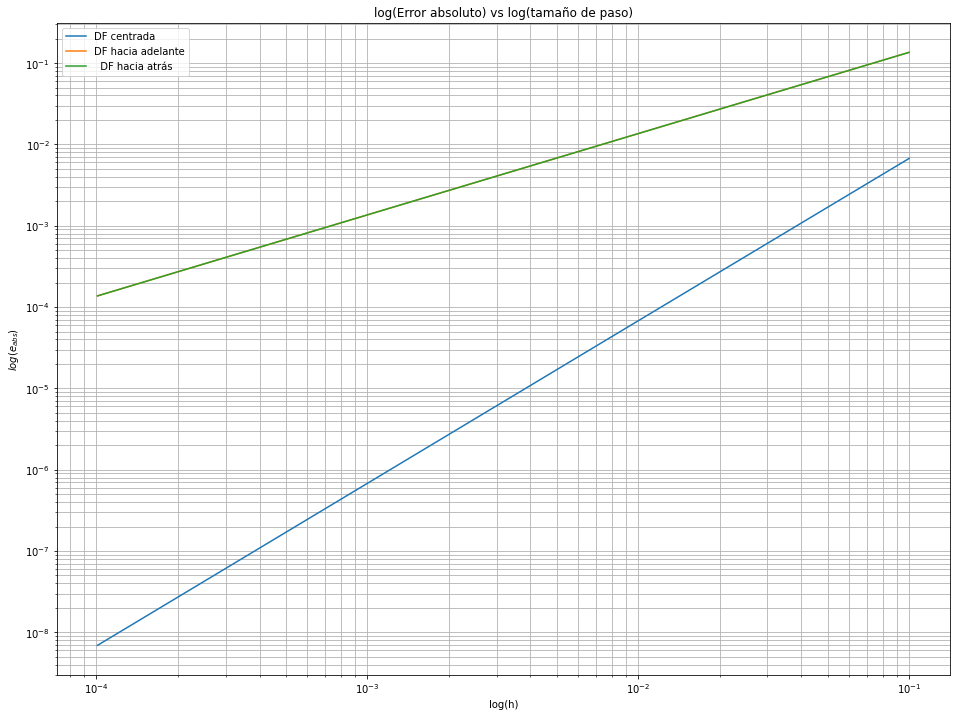

In [ ]:
plt.figure(figsize = (16, 12)) #tamaño del plot

# GRAFICA DE LOS ERRORES (Escala normal)
'''
plt.plot(h_l, errc_l)
plt.plot(h_l, errad_l)
plt.plot(h_l, errat_l)
'''

# GRAFICA DE LOS ERRORES (Escala Logaritmica)
plt.loglog(h_l,errc_l)
plt.loglog(h_l,errad_l)
plt.loglog(h_l,errat_l)

plt.legend(['DF centrada','DF hacia adelante','  DF hacia atrás'])
plt.title('log(Error absoluto) vs log(tamaño de paso)')
plt.xlabel('log(h)')
plt.ylabel('$log(e_{abs})$')
plt.grid(True, which="both", ls="-")
plt.show()

Aquí vemos los órdenes de convergencia para cada método de DF. los errores de los métodos de DF hacia adelante y hacia atrás llegan aproximadamente a un orden de $10^{-4}$, mientras que el de DF centrada llega a un orden mayor a $10^{-8}$ para un mismo tamaño de paso $h=10^{-4}$.

### Diferencia finita aproximada de derivadas con series de Taylor

Para obtener una aproximación de la derivada de $ f $, volvemos a la serie de Taylor. Para una función arbitraria $ f (x) $ la serie de Taylor de $ f $ alrededor de $ a = x_j $ es
$$
f(x) = \frac{f(x_j)(x - x_j)^0}{0!} + \frac{f^{\prime}(x_j)(x - x_j)^1}{1!} + \frac{f''(x_j)(x - x_j)^2}{2!} + \frac{f'''(x_j)(x - x_j)^3}{3!} + \cdots.
$$


Si $ x $ está en una cuadrícula de puntos con espaciado $ h $, podemos calcular la serie de Taylor en $ x = x_{j + 1} $ para obtener

$$
f(x_{j+1}) = \frac{f(x_j)(x_{j+1} - x_j)^0}{0!} + \frac{f^{\prime}(x_j)(x_{j+1}- x_j)^1}{1!} + \frac{f''(x_j)(x_{j+1} - x_j)^2}{2!} + \frac{f'''(x_j)(x_{j+1} - x_j)^3}{3!} + \cdots.
$$

Sustituyendo $ h = x_{j + 1} - x_j $ y despejando $ f^{\prime}(x_j) $ da la ecuación

$$
f^{\prime}(x_j) = \frac{f(x_{j+1}) - f(x_j)}{h} + \left(-\frac{f''(x_j)h}{2!} -\frac{f'''(x_j)h^2}{3!} - \cdots\right).
$$

Los términos que están entre paréntesis, $-\frac{f''(x_j)h}{2!} -\frac{f'''(x_j)h^2}{3!} - \cdots$, se llaman **condiciones de pedido más altas** de $ h $. Los términos de orden superior se pueden reescribir como

$$
-\frac{f''(x_j)h}{2!} -\frac{f'''(x_j)h^2}{3!} - \cdots = h(\alpha + \epsilon(h)),
$$

donde $\alpha$ es una constante, y $ \epsilon (h) $ es una función de $ h $ que va a cero cuando $ h $ va a 0. Puedes verificar con algo de álgebra que esto sea cierto. Usamos la abreviatura "$ O (h) $" para $h(\alpha + \epsilon(h))$, y en general, usamos la abreviatura "$ O(h^p) $" para denotar $ h^p(\alpha + \epsilon (h)) $.


Sustituyendo $ O (h) $ en las ecuaciones anteriores se obtiene

$$
f^{\prime}(x_j) = \frac{f(x_{j+1}) - f(x_j)}{h} + O(h).
$$

Esto da la fórmula de **DF hacia adelante** para aproximar derivados como

$$
f^{\prime}(x_j) \approx \frac{f(x_{j+1}) - f(x_j)}{h},
$$

y decimos que esta fórmula es $ O (h) $.

Aquí, $ O (h) $ describe la **precisión** de la fórmula de diferencia anticipada para aproximar derivados. Para una aproximación que es $ O (h^p) $, decimos que $ p $ es el **orden** de la precisión de la aproximación. Con pocas excepciones, la precisión de orden superior es mejor que la de orden inferior. Para ilustrar este punto, suponga $q < p$. Luego, cuando el espaciado, $h> 0$, va a 0, $ h^p $ va a 0 más rápido que $ h ^ q $. Por lo tanto, a medida que $ h $ llega a 0, una aproximación de un valor que es $ O(h^p) $ se acerca al valor verdadero más rápido que uno que es $ O (h^q) $.

Calculando la serie de Taylor alrededor de $ a = x_j $ en $ x = x_{j-1} $ y resolviendo nuevamente $ f^{\prime} (x_j) $, obtenemos la fórmula de **DF hacia atrás**

$$
f^{\prime}(x_j) \approx \frac{f(x_j) - f(x_{j-1})}{h},
$$

que también es $ O (h) $. Debe intentar verificar este resultado por su cuenta.

Intuitivamente, las fórmulas de diferencia hacia adelante y hacia atrás para la derivada en $ x_j $ son solo las pendientes entre el punto en $ x_j $ y los puntos $ x_{j + 1} $ y $ x_{j-1} $, respectivamente.

Podemos construir una aproximación mejorada de la derivada mediante la manipulación inteligente de los términos de la serie de Taylor tomados en diferentes puntos. Para ilustrar, podemos calcular la serie de Taylor alrededor de $ a = x_j $ en $ x_ {j + 1} $ y $ x_{j-1} $. Escritas, estas ecuaciones son

$$
f(x_{j+1}) = f(x_j) + f^{\prime}(x_j)h + \frac{1}{2}f''(x_j)h^2 + \frac{1}{6}f'''(x_j)h^3 + \cdots
$$

y


$$
f(x_{j-1}) = f(x_j) - f^{\prime}(x_j)h + \frac{1}{2}f''(x_j)h^2 - \frac{1}{6}f'''(x_j)h^3 + \cdots.
$$

Restar las fórmulas anteriores da

$$
f(x_{j+1}) - f(x_{j-1}) = 2f^{\prime}(x_j)h + \frac{1}{3}f'''(x_j)h^3 + \cdots,
$$

que cuando se resuelve para $f^{\prime} (x_j)$ da la fórmula de **DF centrada**

$$
f^{\prime}(x_j) \approx \frac{f(x_{j+1}) - f(x_{j-1})}{2h}.
$$

Debido a cómo restamos las dos ecuaciones, los términos $ h $ se cancelaron; por lo tanto, la fórmula de diferencia central es $ O (h ^ 2) $, ¡aunque requiere la misma cantidad de esfuerzo computacional que las fórmulas de diferencia hacia adelante y hacia atrás! Por lo tanto, la fórmula de diferencia central obtiene un orden adicional de precisión de forma gratuita. En general, las fórmulas que utilizan puntos simétricos alrededor de $ x_j $, por ejemplo $ x_{j-1} $ y $ x_{j + 1} $, tienen mejor precisión que las asimétricas, como las fórmulas de diferencia directa y de fondo.

La siguiente figura muestra la diferencia hacia adelante (línea que une $ (x_j, y_j) $ y $ (x_{j + 1}, y_{j + 1}) $), la diferencia hacia atrás (línea que une $ (x_j, y_j) $ y $ (x_{j-1}, y_{j-1}) $) y diferencia central (línea que une $ (x_{j-1}, y_{j-1}) $ y $ (x_{j + 1 }, y_{j + 1}) $) aproximación de la derivada de una función $ f $. Como se puede ver, la diferencia en el valor de la pendiente puede ser significativamente diferente según el tamaño del paso $ h $ y la naturaleza de la función.

### Aproximado de derivados de orden superior

También es posible utilizar la serie de Taylor para aproximar derivadas de orden superior (por ejemplo, $ f '' (x_j), f '' '(x_j) $, etc.). Por ejemplo, tomando la serie de Taylor alrededor de $ a = x_j $ y luego calculándola en $x = x_{j-1} $ y $ x_{j + 1} $ da

$$
f (x_{j-1}) = f (x_j) - hf ^ {\prime} (x_j) + \frac{h^2f '' (x_j)} {2} - \frac{h ^ 3f '' ' (x_j)}{6} + \cdots $$

y

$$ f (x_ {j + 1}) = f(x_j) + hf^{\prime}(x_j) + \frac{h ^ 2f '' (x_j)}{2} + \frac{h^3f ' '' (x_j)}{6} + \cdots. $$

Si sumamos estas dos ecuaciones, obtenemos

$$ f (x_{j-1}) + f (x_{j + 1}) = 2f (x_j) + h ^ 2f '' (x_j) + \frac{h ^ 4f '' '' (x_j)}{24} + \cdots, $$

y con alguna reordenación da la aproximación
$$ f '' (x_j) \approx \frac{f (x_ {j + 1}) - 2f (x_j) + f (x_ {j-1})}{h^2}, $$

y es $ O (h ^ 2) $.

In [ ]:
from scipy.misc import derivative as deriv

#n: orden de la derivada, order: orden de la aproximación por Serie de  Taylor

#      deriv( f , x0 , dx=0.1 )   SCIPY
# derivative( f , x0 ,  h=0.1 )   PROPIO

print('derivative PROPIO: ', derivative(e,0)  ,'|  derivative SciPy',deriv(e,0,dx=0.1))#,n=1,order=9)) 

derivative PROPIO:  0.9999933444461767 |  derivative SciPy 0.9999933444461767


Text(0.5, 0, 'x')

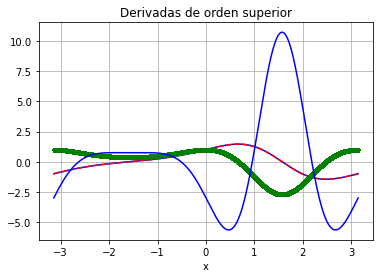

In [ ]:
plt.plot(x,de(x),'b')

# n : orden de la derivada
# order : error de truncamiento  (impar)
# OBS : order > n 

plt.plot(x,deriv(e,x,dx=0.1,n=1,order=3),'r--',ms=5)  # PRIMERA DERIVADA
plt.plot(x,deriv(e,x,dx=0.1,n=2,order=3),'g*',ms=5)   # SEGUNDA DERIVADA
plt.plot(x,deriv(e,x,dx=0.1,n=4,order=5),'b',ms=5)    # CUARTA DERIVADA

plt.title('Derivadas de orden superior')
plt.grid()
plt.xlabel('x')


### Diferenciación numérica con ruido

Como se indicó anteriormente, a veces $ f $ se da como un vector donde $ f $ es el valor de función correspondiente para valores de datos independientes en otro vector $ x $, que está en cuadrícula. A veces, los datos pueden estar contaminados con **ruido**, lo que significa que su valor se desvía una pequeña cantidad de lo que sería si se calculara a partir de una función matemática pura. Esto a menudo puede ocurrir en ingeniería debido a inexactitudes en los dispositivos de medición o los datos en sí pueden modificarse levemente por perturbaciones fuera del sistema de interés. Por ejemplo, puede estar tratando de escuchar a su amigo hablar en una habitación llena de gente. La señal $ f $ podría ser la intensidad y los valores tonales en el discurso de su amigo. Sin embargo, debido a que la habitación está abarrotada, el ruido de otras conversaciones se escucha junto con el habla de su amigo y se vuelve difícil de entender.

Para ilustrar este punto, calculamos numéricamente la derivada de una onda cosenoidal simple corrompida por una onda sinusoidal pequeña. Considere las siguientes dos funciones:

$$ f (x) = \cos (x) $$

y

$$ f_{\epsilon, \omega} (x) = \cos(x) + \epsilon \sin (\omega x) $$

donde $ 0 <\epsilon \ll 1 $ es un número muy pequeño y $ \omega $ es un número grande. Cuando $ \epsilon $ es pequeño, está claro que $ f \simeq f _{\epsilon, \omega} $. Para ilustrar este punto, graficamos $ f _{\epsilon, \omega} (x) $ para $ \epsilon = 0.01 $ y $ \omega = 100 $, y podemos ver que está muy cerca de $  f (x) $ , como se muestra en la siguiente figura.

In [ ]:
def few(x,eps=0.01,ome=100):
  return np.cos(x)+ eps*np.sin(ome*x)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn-poster')
%matplotlib inline

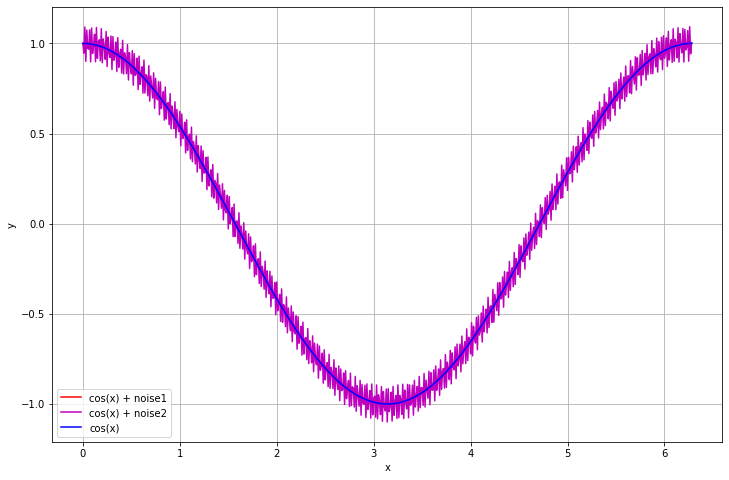

In [ ]:
# dominio : [0;2pi]
x = np.arange(0, 2*np.pi, 0.01) 

# compute function
omega = 1000
epsilon1 = 0.01
epsilon2 = 0.1

y = np.cos(x)                           # funcion coseno (funcion pura)

y_noise = y + epsilon1*np.sin(omega*x)   # funcion coseno (funcion con ruido)
y_noise2 = y + epsilon2*np.sin(omega*x)  # funcion coseno (funcion con ruido)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', label = 'cos(x) + noise1')
plt.plot(x, y_noise2, 'm-', label = 'cos(x) + noise2')
plt.plot(x, y, 'b-', label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Las derivadas de nuestras dos funciones de prueba son

$$f^{\prime}(x) = -\sin(x)$$

y

$$f_{\epsilon,\omega}^{\prime}(x) = -\sin(x)+\epsilon\omega \cos(\omega x).$$

Dado que $ \epsilon \omega $ puede no ser pequeño cuando $\omega $ es grande, la contribución del ruido a la derivada puede no ser pequeña. Como resultado, la derivada (analítica y numérica) puede no ser utilizable. Por ejemplo, la siguiente figura muestra $f^{\prime}(x)$ and $f^{\prime}_{\epsilon,\omega}(x)$ para $\epsilon = 0.01$ and $\omega = 100$.

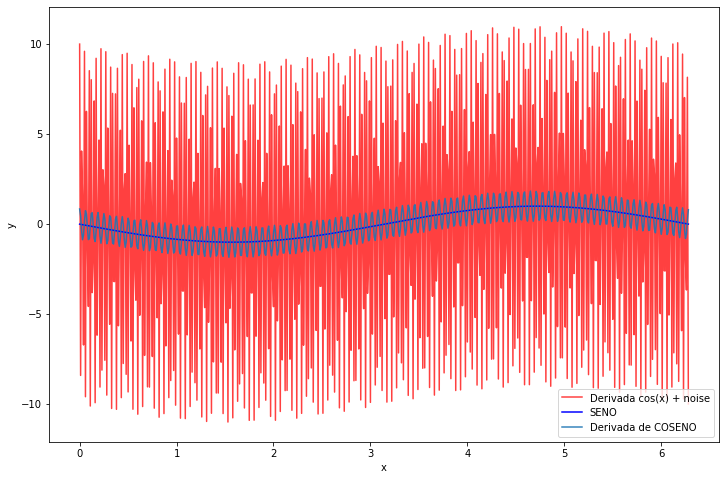

In [ ]:
# dominio : [0;2pi]
x = np.arange(0, 2*np.pi, 0.01) 

# compute function
y = -np.sin(x)  # funcion pura -SENO

y_noise = y + epsilon*omega*np.cos(omega*x)    # Funcion -SENO con RUIDO
y_n_diff=derivative(few,x,h=1e-2)              # Funcion derivada del -SENO

# Plot solution
plt.figure(figsize = (12, 8))

plt.plot(x, y_noise, 'r-', alpha=0.75,label = 'Derivada cos(x) + noise')
plt.plot(x, y, 'b-', label = 'SENO')

#plt.plot(x, y, 'b-', \
#         label = 'Derivative of cos(x)')

plt.plot(x,y_n_diff,alpha=0.9,label='Derivada de COSENO')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

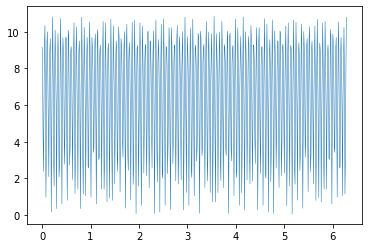

In [ ]:
error=np.abs(y_noise-y_n_diff)
plt.plot(x,error,linewidth=0.5)

## 2. Interpolación polinomial de Lagrange

En lugar de encontrar polinomios cúbicos entre pares posteriores de puntos de datos, la **interpolación polinomial de Lagrange** encuentra un único polinomio que pasa por todos los puntos de datos. Este polinomio se conoce como **polinomio de Lagrange**, $ L (x) $, y como función de interpolación, debe tener la propiedad $ L (x_i) = y_i $ para cada punto del conjunto de datos. Para calcular polinomios de Lagrange, es útil escribirlos como una combinación lineal de **polinomios de base de Lagrange**, $ P_i (x) $, donde
$$
P_i(x) = \prod_{j = 1, j\ne i}^n\frac{x - x_j}{x_i - x_j},
$$

and
$$
L(x) = \sum_{i = 1}^n y_i P_i(x).
$$

Aquí, $ \prod $ significa "el producto de" o "multiplicar".

Notará que por construcción, $ P_i (x) $ tiene la propiedad de que $ P_i (x_j) = 1 $ cuando $ i = j $ y $ P_i (x_j) = 0 $ cuando $ i \ ne j $. Como $ L (x) $ es una suma de estos polinomios, puede observar que $ L (x_i) = y_i $ para cada punto, exactamente como se desee.

**¡PRUEBA!** Encuentra los polinomios de base de Lagrange para el conjunto de datos *x = [0, 1, 2]* y *y = [1, 3, 2]*. Grafique cada polinomio y verifique la propiedad de que $ P_i (x_j) = 1 $ cuando $ i = j $ y $ P_i (x_j) = 0 $ cuando $ i \ne j $.


\begin{eqnarray*}
P_1(x) &=& \frac{(x - x_2)(x - x_3)}{(x_1-x_2)(x_1-x_3)} = \frac{(x - 1)(x - 2)}{(0-1)(0-2)} = \frac{1}{2}(x^2 - 3x + 2),\\
P_2(x) &=& \frac{(x - x_1)(x - x_3)}{(x_2-x_1)(x_2-x_3)} = \frac{(x - 0)(x - 2)}{(1-0)(1-2)} = -x^2 + 2x,\\
P_3(x) &=& \frac{(x - x_1)(x - x_2)}{(x_3-x_1)(x_3-x_2)} = \frac{(x - 0)(x - 1)}{(2-0)(2-1)} = \frac{1}{2}(x^2 - x).
\end{eqnarray*}

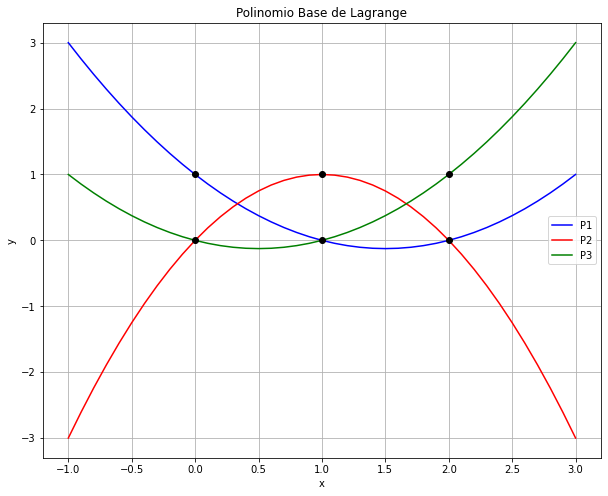

In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

# valores de X 
x = [0, 1, 2]
# valores de Y
y = [1, 3, 2]

# VECTORES que almacenan los coeficientes de P_i
# VECTOR : [coef. INDEP. , coef. LINEAL, coef. CUADRATICO, ...]

P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function P(x) = Ind. + Lineal*X + cuadr.*X^2
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

# nuevo dominio 
x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
# GRAFICAR CADA POLINOMIO en el D
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Polinomio Base de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

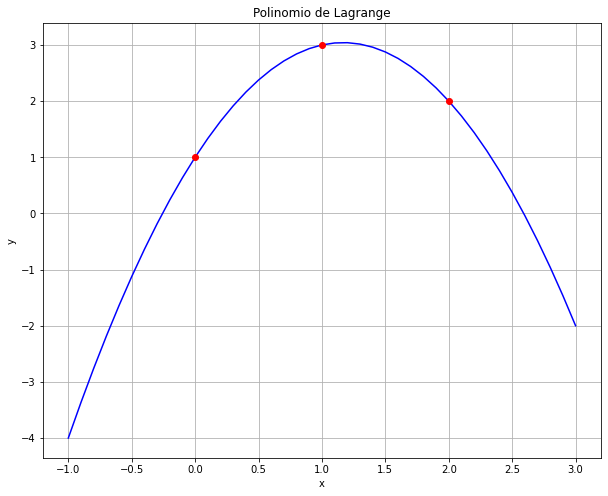

In [ ]:
# POLINOMIO INTERPOLACION LAGRANGE
L = 1*P1 + 3*P2 + 2*P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Polinomio de Lagrange')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

    valores de fi:  [1 3 2]
divisores en L(i):  [ 2. -1.  2.]

Polinomio de Lagrange: 
-3*x**2/2 + 7*x/2 + 1


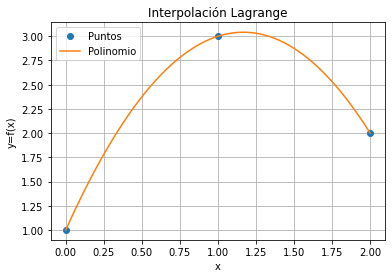

In [ ]:
# Interpolacion de Lagrange
# divisoresL solo para mostrar valores
import numpy as np
import sympy as sym             #librería de cálculo simbólico (analítico)
import matplotlib.pyplot as plt
###################################

# INGRESO , Datos de prueba
xi = np.array([0, 1, 2])  # VALORES de X
fi = np.array([1, 3, 2])  # VALORES de Y=f(x)

# PROCEDIMIENTO
# Polinomio de Lagrange
n = len(xi)   # Numero de elementos del vector (DATOS)
x = sym.Symbol('x')    # variable simbólica

polinomio = 0   # variable auxiliar
divisorL = np.zeros(n, dtype = float)

for i in range(0,n,1):
    
    # Termino de Lagrange
    numerador = 1
    denominador = 1

    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])

    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
#Dado un polinomio, expand() lo pondrá en una forma canónica de una suma de monomios.
polisimple = polinomio.expand()

# para evaluación numérica (POLINOMIO DE LAGRANGE)
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101  # numero de datos espaciados
a = np.min(xi)  # extremo menor del dominio
b = np.max(xi)  # extremo mayor del dominio

pxi = np.linspace(a,b,muestras)   # vector de valores DOMINIO
pfi = px(pxi)                     # vector de valores RANGO

############################################
# SALIDA
print('    valores de fi: ',fi)
print('divisores en L(i): ',divisorL)
print()
#print('Polinomio de Lagrange, expresiones')
#print(polinomio)
#print()
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')  # PUNTOS (DATOS)
plt.plot(pxi,pfi, label = 'Polinomio') # POLINOMIO LAGRANGE
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.grid()
plt.title('Interpolación Lagrange')
plt.show()

**¡ADVERTENCIA!** Los polinomios de interpolación de Lagrange se definen fuera del área de interpolación, es decir, fuera del intervalo $ [x_1, x_n] $, crecerán muy rápido y sin límites fuera de esta región. Esta no es una característica deseable porque, en general, este no es el comportamiento de los datos subyacentes. Por lo tanto, nunca se debe utilizar una interpolación de Lagrange para interpolar fuera de esta región.

## Lagrange con SciPy

En lugar de calcular todo desde cero, en scipy, podemos usar la función *lagrange* directamente para interpolar los datos. Veamos el ejemplo anterior.

In [ ]:
from scipy.interpolate import lagrange

In [ ]:
x = [0, 1, 2]
y = [1, 3, 2]

# Polinomio de Lagrange (Explicito)
f = lagrange(x, y)

print(f)

      2
-1.5 x + 3.5 x + 1


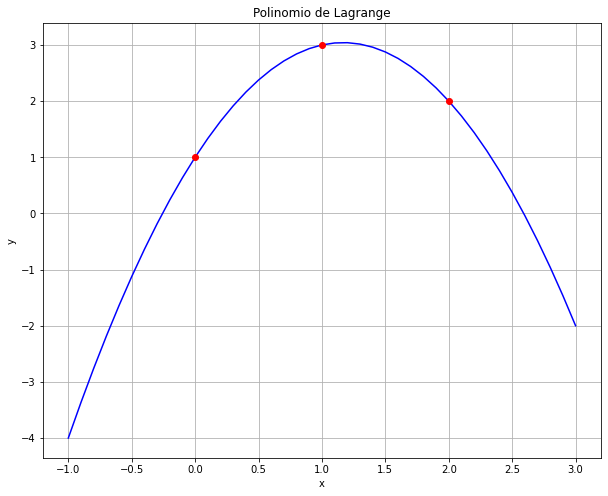

In [ ]:
# x_new (definido arriba)  x :[-1,3]

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Polinomio de Lagrange')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 3. Interpolación polinómica de Newton



La interpolación polinomial de Newton es otra forma popular de ajustar exactamente un conjunto de puntos de datos. La forma general del polinomio de Newton de orden $ n-1 $ que pasa por $ n $ puntos es:

$$ f(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + \dots + a_n(x-x_0)(x-x_1)\dots(x-x_n)$$

Que se puede reescribir como:

$$ f(x) = \sum_{i=0}^{n}{a_in_i(x)}$$ 

donde $$ n_i(x) = \prod_{j=0}^{i-1}(x-x_j)$$

La característica especial del polinomio de Newton es que los coeficientes $ a_i $ se pueden determinar mediante un procedimiento matemático muy simple. Por ejemplo, dado que el polinomio pasa por cada punto de datos, por lo tanto, para los puntos de datos $ (x_i, y_i) $, tendremos $ f (x_i) = y_i $, por lo que tenemos

$$f(x_0) = a_0 = y_0$$

y $f(x_1) = a_0 + a_1(x_1-x_0) = y_1$, reorganizándolo para obtener $ a_1 $, tendremos:

$$a_1 = \frac{y_1 - y_0}{x_1 - x_0}$$

Now, insert data points $(x_2, y_2)$, we can calculate $a_2$, and it is in the form:

$$a_2 = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}$$

Hagamos un punto de datos más $ (x_3, y_3) $ para calcular $ a_3 $, después de insertar el punto de datos en la ecuación, obtenemos:

$$a_3 = \frac{\frac{\frac{y_3-y_2}{x_3-x_2} - \frac{y_2 - y_1}{x_2-x_1}}{x_3 - x_1} - \frac{\frac{y_2-y_1}{x_2-x_1}-\frac{y_1 - y_0}{x_1 - x_0}}{x_2-x_0}}{x_3 - x_0}$$

Ahora, ¿ves los patrones? Estos se denominan **diferencias divididas**, si definimos:

$$ f[x_1, x_0] = \frac{y_1 - y_0}{x_1 - x_0}$$

$$ f[x_2, x_1, x_0] = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} = \frac{f[x_2,x_1] - f[x_1,x_0]}{x_2-x_1}$$

Continuamos escribiendo esto, tendremos la siguiente ecuación de iteración:

$$ f[x_k, x_{k-1}, \dots, x_{1}, x_0] = \frac{f[x_k, x_{k-1}, \dots, x_{2}, x_2] - f[x_{k-1}, x_{k-2}, \dots, x_{1}, x_0]}{x_k-x_0}$$

Podemos ver una belleza del método es que, una vez que se determinan los coeficientes, agregar nuevos puntos de datos no cambiará los calculados, solo necesitamos calcular las diferencias más altas continúa de la misma manera. Todo el procedimiento para encontrar estos coeficientes se puede resumir en una tabla de diferencias divididas. Veamos un ejemplo usando 5 puntos de datos:

$$
\begin{array}{cccccc}
x_0 & y_0 \\
    &     & f[x_1,x_0] \\
x_1 & y_1 &             & f[x_2, x_1,x_0]\\
    &     & f[x_2,x_1]  &              & f[x_3, x_2, x_1,x_0]\\
x_2 & y_2 &             & f[x_3, x_2,x_1] &             & f[x_4, x_3, x_2, x_1,x_0]\\
    &     & f[x_3,x_2]  &              & f[x_4, x_3, x_2, x_1]\\
x_3 & y_3 &             & f[x_4, x_3,x_2]\\
    &     & f[x_4,x_3] \\
x_4 & y_4
\end{array}
$$

Cada elemento de la tabla se puede calcular utilizando los dos elementos anteriores (a la izquierda). En realidad, podemos calcular cada elemento y almacenarlos en una matriz diagonal, es decir, la matriz de coeficientes se puede escribir como:

$$
\begin{array}{cccccc}
y_0 & f[x_1,x_0] & f[x_2, x_1,x_0] & f[x_3, x_2, x_1,x_0] & f[x_4, x_3, x_2, x_1,x_0]\\
y_1 & f[x_2,x_1] & f[x_3, x_2,x_1] & f[x_4, x_3, x_2, x_1] & 0\\
y_2 & f[x_3,x_2] & f[x_4, x_3,x_2] & 0          & 0 \\
y_3 & f[x_4,x_3] & 0 & 0 & 0            \\
y_4 & 0 & 0 & 0  & 0  
\end{array}
$$

Tenga en cuenta que la primera fila de la matriz son en realidad todos los coeficientes que necesitamos, es decir, $ a_0, a_1, a_2, a_3, a_4 $. Veamos un ejemplo de cómo podemos hacerlo.

**¡PRUEBA!** Calcula la tabla de diferencias divididas para x = [-5, -1, 0, 2], y = [-2, 6, 1, 3].

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

In [ ]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)   # cantidad de datos
    coef = np.zeros([n, n])

    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])  # diferencias divididas
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

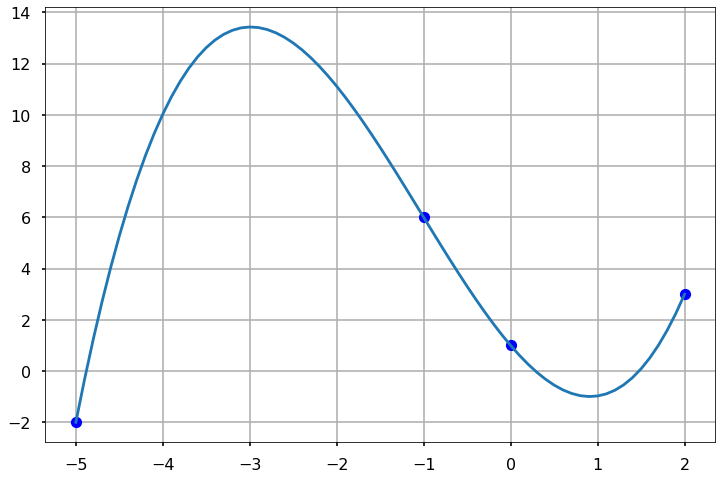

In [ ]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])

# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)  # nuevo dominio
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.grid()

## Problema Físico

<p align="center">
  <img src="http://sites.science.oregonstate.edu/~mcintyre/coriolis/Images/vaneast.GIF"  width=40% />
</p>



$$\vec{F}_{cor} = -2m(\vec{\omega} \times \vec{v})$$

siendo $\vec{\omega}=\omega cos \theta\hat{j}+\omega sin \theta \hat{k}$:

Luego descomponemos la fuerza por su componen vertical y horizontal: $\vec{F}_{cor}=\vec{F}_h+\vec{F}_v$

$$\vec{F}_{cor}=(2m\omega v_y sin \theta \hat{i}-2m\omega v_x sin \theta \hat{j})+( 2m\omega v_x cos\theta \hat{k})$$

<p align="center">
  <img src="https://news-cdn.softpedia.com/images/news2/Coriolis-Effect-Described-Centuries-Before-Coriolis-Lived-2.jpg"  width=40% />
$\phi=\theta$
</p>





*   El principal efecto se da en la componente horizontal de $\vec{F}_{cor}$.
*  La componente vertical (eje-z) actúa en dirección contraria a la aceleración de la gravedad. Por lo que despreciamos esta componente en nuestro enfoque hacia la componente horizontal (1-D).







Si la partícula se mueve en dirección al eje-y, entonces:

$$v_x=0, \vec{F}_{cor}=2m\omega v_y sin \theta \hat{i}$$

Considere un objeto en la superficie de la tierra en caída libre sin otras fuerzas externas que la perturben (i.e. resistencia del aire), entonces la deflección debido a la fuerza de coriolis es:

$$ x= \frac{\omega g t^3 cos\theta}{3}$$

In [ ]:
def x_cor(t,omega=100,g=9.8,theta=12.2):
  return (omega*g*t**3*np.cos(theta*(np.pi)/(180)))/3


In [ ]:
from scipy.misc import derivative as deriv

#n: orden de la derivada, order: orden de la aproximación por Serie de  Taylor
print('derivative: ', derivative(e,0)  ,'|  derivative SciPy',deriv(e,0,dx=0.1))#,n=1,order=9)) 

derivative:  0.9999933444461767 |  derivative SciPy 0.9999933444461767


Text(0.5, 0, '$t(s)$')

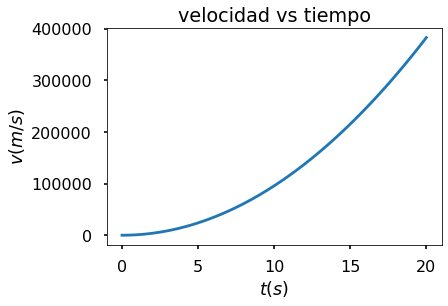

In [ ]:
t=np.linspace(0,20,100)
vel=deriv(x_cor,t,dx=1e-5,order=9)
plt.plot(t,vel)
plt.title('velocidad vs tiempo')
plt.ylabel('$v(m/s)$')
plt.xlabel('$t(s)$')

Text(0.5, 0, '$x(m)$')

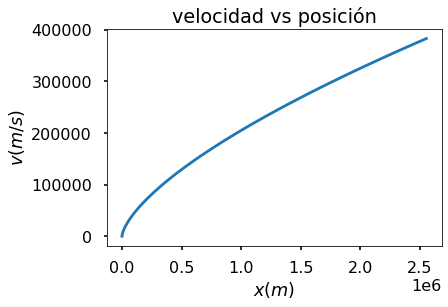

In [ ]:
plt.plot(x_cor(t),vel)
plt.title('velocidad vs posición')
plt.ylabel('$v(m/s)$')
plt.xlabel('$x(m)$')

Text(0.5, 0, '$t(s)$')

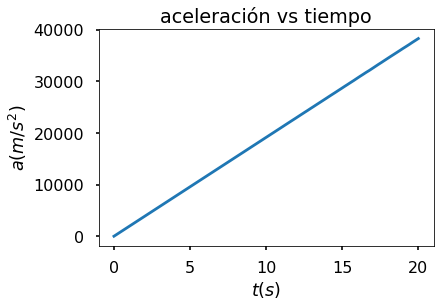

In [ ]:
acel=deriv(x_cor,t,dx=1e-5,n=2,order=9)
plt.plot(t,acel)
plt.title('aceleración vs tiempo')
plt.ylabel('$a(m/s^2)$')
plt.xlabel('$t(s)$')

En este ejemplo hemos podido estudiar la deflección en la componente $x$ 

# Resumen


1. Debido a que la derivación explícita de funciones es a veces engorrosa para aplicaciones de ingeniería, pueden ser preferibles los enfoques numéricos.
2. La aproximación numérica de derivadas se puede hacer usando una cuadrícula en la que la derivada se aproxima por diferencias finitas.
3. Las diferencias finitas se aproximan a la derivada por razones de diferencias en el valor de la función en intervalos pequeños.
4. Los esquemas de diferencias finitas tienen diferentes órdenes de aproximación según el método utilizado.
5. Hay problemas con las diferencias finitas para la aproximación de derivadas cuando los datos son ruidosos.
6. El objetivo principal de la interpolación es poder estimar valores funcionales a partir de cierto número de datos iniciales.
7. El polinomio de interpolación de Lagrange es una reformulación del polinomio de Newton que evita el cálculo de las diferencias divididas.
8. El aumento de grado no siempre mejora la aproximación.

## 5. Recursos útiles

* ["Diferenciación numérica"](https://www.math.ubc.ca/~pwalls/math-python/differentiation/differentiation/)
* ["Tiempo de ejecución"](https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution)
* Q. Kong, T. Siauw, A, Bayen , 'Python Programming And Numerical Methods: A Guide For Engineers And Scientists", Elsevier
* ["How to Think Like a Computer Scientist"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/merging_dataframes_tutorial_max_palko.ipynb) - Think Python Versión 2.0.17 by Allen Doney. (libro completo [aquí](https://www.greenteapress.com/thinkpython/thinkpython.pdf))
* Frautschi, Steven C.; Olenick, Richard P.; Apostol, Tom M.; Goodstein, David L. (2007). The Mechanical Universe: Mechanics and Heat, Advanced Edition. Cambridge University Press. p. 208. ISBN 978-0-521-71590-4

## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>